In [18]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

from PIL import Image
from matplotlib import image
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.cluster import MiniBatchKMeans

In [8]:
outbreaks = pd.read_csv('nigeria_outbreaks.csv')
outbreaks = pd.DataFrame(outbreaks)
print(outbreaks.columns)
print(outbreaks.info())


Index(['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male',
       'gender_female', 'state', 'settlement', 'rural_settlement',
       'urban_settlement', 'report_date', 'report_year', 'age', 'age_str',
       'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera',
       'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis',
       'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria',
       'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead',
       'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
id                            284484 non-null int64
surname                       284484 non-null object
firstname                     284484 non-null object
middlename                    284484 non-null object
gender                        284484 non-null object
gender_male  

# The Data
Nigerian Disease Outbreaks

Immediately, I will drop the following columns:

id, surname, fistname, middlename: these are meaningless and randomly assigned as the index (id) and by the 

While at first glance there appear to be no nulls, it is apparent in the data that null values have been filled with the word 'Null' and the date '0000-00-00. I'll go through and replace each of these cells with NaNs. Additionally, I'll convert all strings to lowercase to ensure I don't have multiple variables for the same values.

After these changes, I've used df.info and df.value_counts to ensure that all variables are sound - there are no repeats of strings due to mispellings or null values. Columns report_date, date_of_birth, and serotype are missing values. Additioally, serotype has one entry of 'null serotype'. I will decide how to handle these as I move along.

In [ ]:
outbreaks.drop(columns=['id','surname', 'firstname', 'middlename', 'gender', 'gender_female', 'settlement',   
                        'urban_settlement','age_str', 'child_group', 'dead', 'unconfirmed'], inplace=True)

In [4]:
# replacing all 'Null' values and '0000-00-00' with NaNs
outbreaks = outbreaks.applymap(lambda x: np.nan if x=='Null' else x)
outbreaks = outbreaks.applymap(lambda x: np.nan if x=='0000-00-00' else x)

# making all strings lowercase 
outbreaks = outbreaks.applymap(lambda x: x.lower() if type(x) == str  else x)

pd.options.display.max_columns = None
outbreaks.head(30)

,surname,firstname,middlename,gender_male,gender_female,state,rural_settlement,urban_settlement,report_date,report_year,age,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,solade,grace,solape,0,1,rivers,1,0,2018-05-15,2018,32,1986-01-17,0,1,cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
1,eneche,kure,balogun,1,0,ebonyi,1,0,2017-02-28,2017,32,1985-09-01,0,1,marburg virus,0,0,0,0,0,0,1,0,0,0,NaN,0,0,1,alive,1,0,confirmed,1,0,1
2,sanusi,adaugo,katerine,0,1,ogun,0,1,2012-03-02,2012,24,1988-05-01,0,1,marburg virus,0,0,0,0,0,0,1,0,0,0,NaN,0,0,1,dead,0,1,not confirmed,1,0,1
3,sowore,mooslemat,ifedayo,0,1,ondo,1,0,2010-05-21,2010,63,1947-05-24,0,1,measles,0,0,1,0,0,0,0,0,0,0,NaN,0,0,1,alive,1,0,not confirmed,1,0,1
4,abdusalam,yusuf,okafor,1,0,oyo,0,1,2017-08-28,2017,9,2008-01-07,1,0,rubella mars,0,0,0,0,0,0,0,0,1,0,NaN,0,0,1,alive,1,0,confirmed,1,0,1
5,yakubu,janet,chioma,0,1,kaduna,1,0,2012-06-27,2012,44,1968-06-06,0,1,ebola,0,0,0,0,0,1,0,0,0,0,NaN,0,0,1,alive,1,0,confirmed,1,0,1
6,razak,adaugo,adaobi,0,1,taraba,1,0,2010-04-01,2010,61,1949-07-19,0,1,yellow fever,0,0,0,0,0,0,0,1,0,0,NaN,0,0,1,alive,1,0,confirmed,0,1,1
7,annakyi,danmbazzu,osagie,1,0,katsina,1,0,2015-10-04,2015,2,2014-12-18,1,0,diarrhoea,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,alive,1,0,not confirmed,1,0,1
8,adejoro,iyin,osatimehin,1,0,katsina,1,0,2011-11-14,2011,54,1957-08-05,0,1,rubella mars,0,0,0,0,0,0,0,0,1,0,NaN,0,0,1,alive,1,0,confirmed,1,0,1
9,okorie,adaugo,chika,0,1,osun,0,1,2014-06-17,2014,15,1999-10-19,1,0,marburg virus,0,0,0,0,0,0,1,0,0,0,NaN,0,0,1,alive,1,0,confirmed,1,0,1


In [5]:
outbreaks.info()

for column in outbreaks.columns:
    print(column, '\n \n')
    print(outbreaks[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 36 columns):
surname                       284484 non-null object
firstname                     284484 non-null object
middlename                    284484 non-null object
gender_male                   284484 non-null int64
gender_female                 284484 non-null int64
state                         284484 non-null object
rural_settlement              284484 non-null int64
urban_settlement              284484 non-null int64
report_date                   283112 non-null object
report_year                   284484 non-null int64
age                           284484 non-null int64
date_of_birth                 279426 non-null object
child_group                   284484 non-null int64
adult_group                   284484 non-null int64
disease                       284484 non-null object
cholera                       284484 non-null int64
diarrhoea                     284484 non-null int6

In [6]:
outbreaks.drop(columns=['serotype'], inplace=True)
outbreaks.dropna(inplace=True)
outbreaks.info()
drop 'surname', 'firstname', 'middlename', 'gender_female', 'urban_settlement', 'child_group', 'dead', 'unconfirmed'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278080 entries, 0 to 284483
Data columns (total 35 columns):
surname                       278080 non-null object
firstname                     278080 non-null object
middlename                    278080 non-null object
gender_male                   278080 non-null int64
gender_female                 278080 non-null int64
state                         278080 non-null object
rural_settlement              278080 non-null int64
urban_settlement              278080 non-null int64
report_date                   278080 non-null object
report_year                   278080 non-null int64
age                           278080 non-null int64
date_of_birth                 278080 non-null object
child_group                   278080 non-null int64
adult_group                   278080 non-null int64
disease                       278080 non-null object
cholera                       278080 non-null int64
diarrhoea                     278080 non-null int6

In [9]:
dp = pd.read_csv('disease_prediction.csv')
dp = pd.DataFrame(dp)
print(dp.columns)
print(dp.info())

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [12]:
for column in dp.columns:
    print(column, ':', dp[column].isna().sum())

itching : 0
skin_rash : 0
nodal_skin_eruptions : 0
continuous_sneezing : 0
shivering : 0
chills : 0
joint_pain : 0
stomach_pain : 0
acidity : 0
ulcers_on_tongue : 0
muscle_wasting : 0
vomiting : 0
burning_micturition : 0
spotting_ urination : 0
fatigue : 0
weight_gain : 0
anxiety : 0
cold_hands_and_feets : 0
mood_swings : 0
weight_loss : 0
restlessness : 0
lethargy : 0
patches_in_throat : 0
irregular_sugar_level : 0
cough : 0
high_fever : 0
sunken_eyes : 0
breathlessness : 0
sweating : 0
dehydration : 0
indigestion : 0
headache : 0
yellowish_skin : 0
dark_urine : 0
nausea : 0
loss_of_appetite : 0
pain_behind_the_eyes : 0
back_pain : 0
constipation : 0
abdominal_pain : 0
diarrhoea : 0
mild_fever : 0
yellow_urine : 0
yellowing_of_eyes : 0
acute_liver_failure : 0
fluid_overload : 0
swelling_of_stomach : 0
swelled_lymph_nodes : 0
malaise : 0
blurred_and_distorted_vision : 0
phlegm : 0
throat_irritation : 0
redness_of_eyes : 0
sinus_pressure : 0
runny_nose : 0
congestion : 0
chest_pain : 0


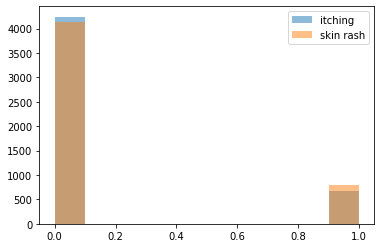

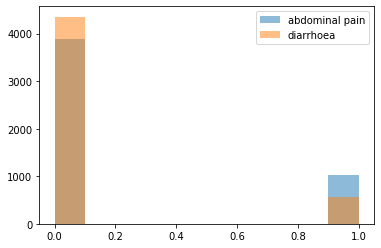

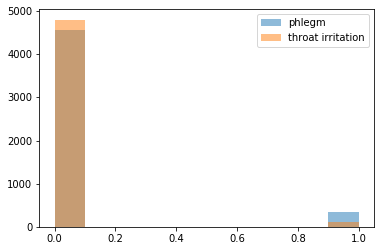

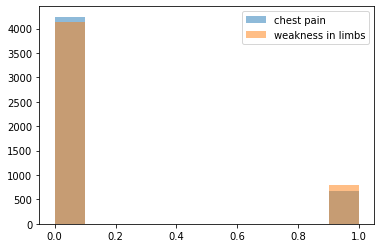

In [17]:
itch = dp['itching']
rash = dp['skin_rash']
plt.hist(itch, alpha=0.5, label='itching')
plt.hist(rash, alpha=0.5, label='skin rash')
plt.legend(loc='upper right')
plt.show()

ab_pain = dp['abdominal_pain']
diar = dp['diarrhoea']
plt.hist(ab_pain, alpha=0.5, label='abdominal pain')
plt.hist(diar, alpha=0.5, label='diarrhoea')
plt.legend(loc='upper right')
plt.show()

phlegm = dp['phlegm']
ti = dp['throat_irritation']
plt.hist(phlegm, alpha=0.5, label='phlegm')
plt.hist(ti, alpha=0.5, label='throat irritation')
plt.legend(loc='upper right')
plt.show()

cp = dp['chest_pain']
wil = dp['weakness_in_limbs']
plt.hist(itch, alpha=0.5, label='chest pain')
plt.hist(rash, alpha=0.5, label='weakness in limbs')
plt.legend(loc='upper right')
plt.show()

Feature Importance:  [0.12421203 0.10519501]
Cluster Graph with PCA 


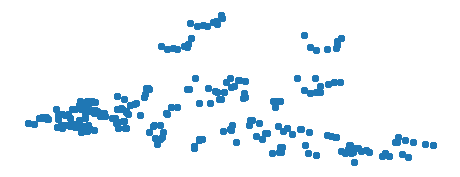

Feature Importance:  [0.12421203 0.10519501 0.06844312 0.06544995 0.05211109 0.03871718
 0.03654698 0.03432113 0.03312326 0.02857376 0.0257928  0.02413164
 0.02365029 0.0214579  0.0202728  0.0183954  0.0176609  0.01715355
 0.01639901 0.01535515 0.0146775 ]


array([[ 7.52508162e-02, -4.71105076e-02, -1.97758513e-02,
        -5.39126559e-03, -1.75130870e-02,  1.21496367e-01,
         1.64556631e-01, -3.43648073e-02, -4.36362193e-02,
        -1.25464631e-02, -1.51626158e-02,  3.17319809e-01,
        -4.35125919e-02, -2.11149740e-02,  2.61818340e-01,
        -2.70632429e-02, -3.29824770e-04, -2.70632429e-02,
        -4.72103421e-02,  2.90239379e-02, -3.95902534e-02,
         9.15244195e-03, -1.51626158e-02, -1.94547869e-02,
         3.97570060e-02,  2.09547002e-01, -1.07281254e-02,
         3.06174515e-02,  2.85454360e-02, -1.07281254e-02,
        -2.54167332e-02,  4.06511203e-02,  2.95243703e-01,
         2.32345594e-01,  2.99827648e-01,  3.74241269e-01,
         4.14683459e-02,  1.73981166e-02,  3.41744533e-03,
         3.09483927e-01,  5.88766344e-02,  1.14479922e-01,
         3.94149591e-02,  3.12078600e-01,  6.28369337e-02,
        -0.00000000e+00,  5.38132349e-03,  7.21263187e-02,
         1.59108539e-01, -5.09157520e-02,  6.12075062e-0

In [20]:
X = dp.drop(columns=['prognosis'])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
print('Feature Importance: ', pca.explained_variance_ratio_)

print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


pca_80 = PCA(n_components=0.8)
pca_80components = pca_80.fit_transform(X)
print('Feature Importance: ', pca_80.explained_variance_ratio_)

pca_1 = PCA(n_components=2)
pca_2 = PCA()
pca.components_

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4920 samples in 0.069s...
[t-SNE] Computed neighbors for 4920 samples in 2.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4920
[t-SNE] Computed conditional probabilities for sample 2000 / 4920
[t-SNE] Computed conditional probabilities for sample 3000 / 4920
[t-SNE] Computed conditional probabilities for sample 4000 / 4920
[t-SNE] Computed conditional probabilities for sample 4920 / 4920
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.284298
[t-SNE] KL divergence after 300 iterations: 1.256753
Cluster Graph with t-SNE with Perplexity  10


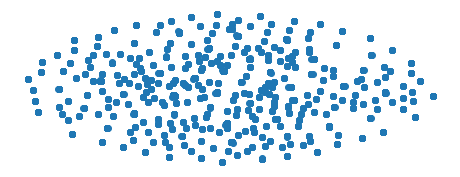

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4920 samples in 0.056s...
[t-SNE] Computed neighbors for 4920 samples in 3.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4920
[t-SNE] Computed conditional probabilities for sample 2000 / 4920
[t-SNE] Computed conditional probabilities for sample 3000 / 4920
[t-SNE] Computed conditional probabilities for sample 4000 / 4920
[t-SNE] Computed conditional probabilities for sample 4920 / 4920
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.108250
[t-SNE] KL divergence after 300 iterations: 1.015980
Cluster Graph with t-SNE with Perplexity  20


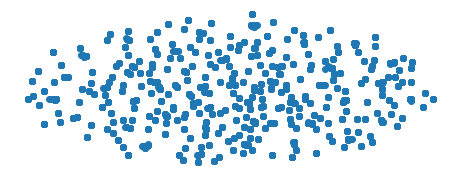

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4920 samples in 0.057s...
[t-SNE] Computed neighbors for 4920 samples in 4.157s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4920
[t-SNE] Computed conditional probabilities for sample 2000 / 4920
[t-SNE] Computed conditional probabilities for sample 3000 / 4920
[t-SNE] Computed conditional probabilities for sample 4000 / 4920
[t-SNE] Computed conditional probabilities for sample 4920 / 4920
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.489986
[t-SNE] KL divergence after 300 iterations: 0.862885
Cluster Graph with t-SNE with Perplexity  30


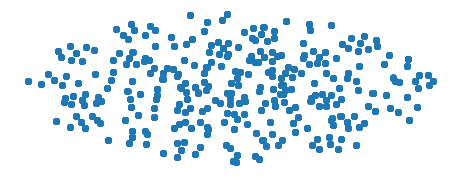

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4920 samples in 0.074s...
[t-SNE] Computed neighbors for 4920 samples in 6.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4920
[t-SNE] Computed conditional probabilities for sample 2000 / 4920
[t-SNE] Computed conditional probabilities for sample 3000 / 4920
[t-SNE] Computed conditional probabilities for sample 4000 / 4920
[t-SNE] Computed conditional probabilities for sample 4920 / 4920
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.921146
[t-SNE] KL divergence after 300 iterations: 0.773669
Cluster Graph with t-SNE with Perplexity  40


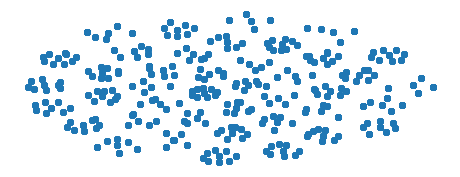

In [22]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


//anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-pac

UMAP with  5 neighbors and  0.01 minimum distance.


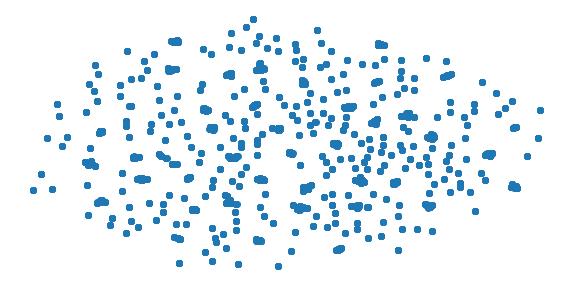

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 300 separate connected components using meta-embedding (experimental)
  n_components
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisa

UMAP with  5 neighbors and  0.1 minimum distance.


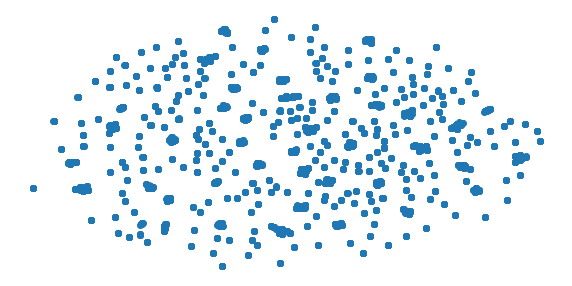

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 294 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  5 neighbors and  0.5 minimum distance.


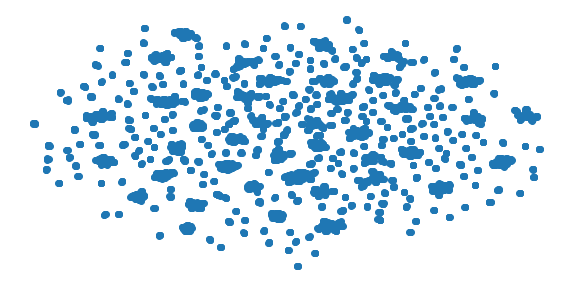

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 80 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  10 neighbors and  0.01 minimum distance.


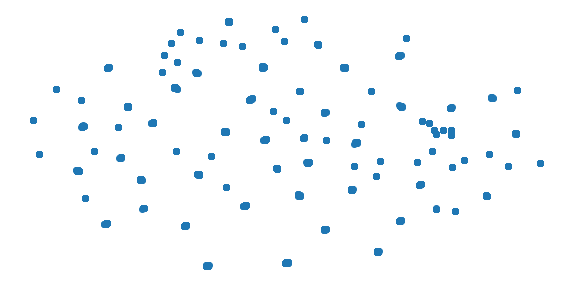

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 88 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  10 neighbors and  0.1 minimum distance.


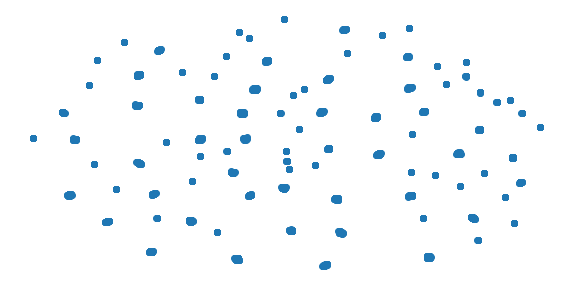

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 88 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  10 neighbors and  0.5 minimum distance.


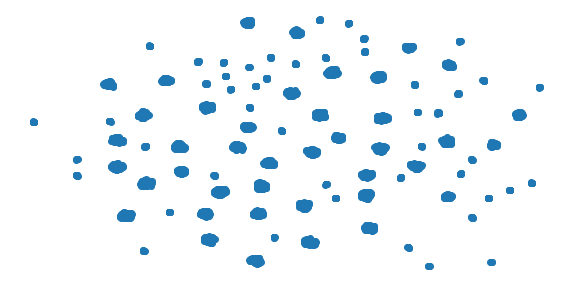

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 43 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  15 neighbors and  0.01 minimum distance.


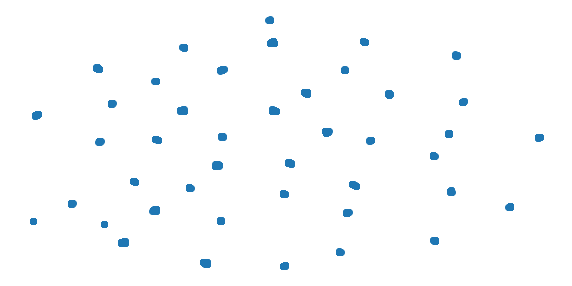

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 43 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  15 neighbors and  0.1 minimum distance.


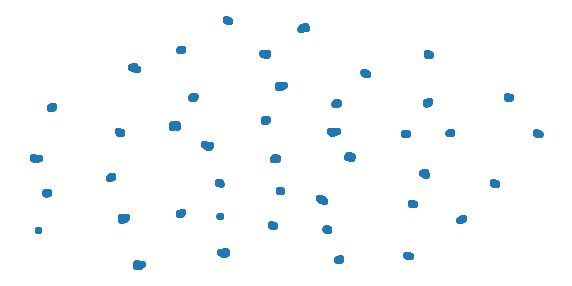

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 43 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  15 neighbors and  0.5 minimum distance.


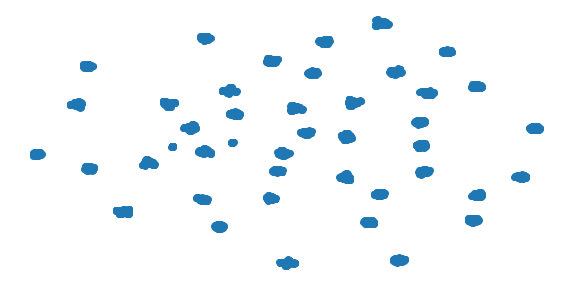

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 41 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  25 neighbors and  0.01 minimum distance.


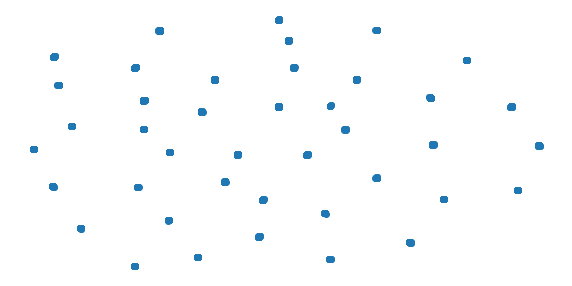

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 41 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  25 neighbors and  0.1 minimum distance.


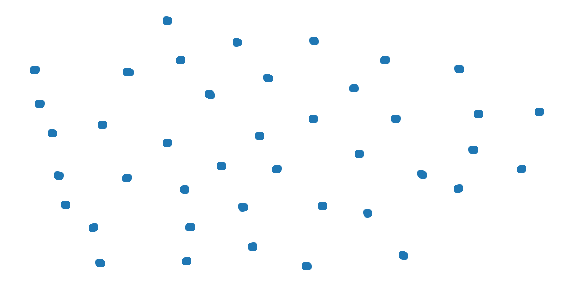

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 35 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  25 neighbors and  0.5 minimum distance.


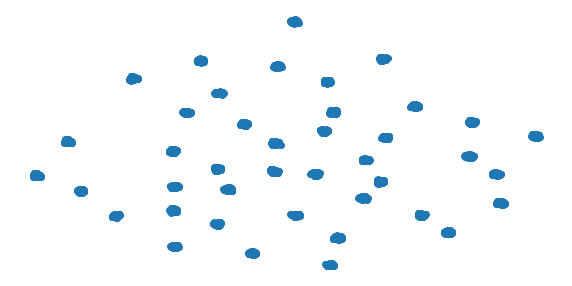

In [23]:
for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

In [28]:
len(dp.prognosis.unique().tolist())

41

In [32]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X)
y_pred = k_means.predict(X)
print(X[:,0])
# Plot the solution.
# plt.scatter(X[:,0], X[:,1], c=y_pred)
# plt.show()

180 ms ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


TypeError: '(slice(None, None, None), 0)' is an invalid key